In [97]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import os
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt



In [100]:
df_train = pd.read_csv('train.txt', header =None, sep =';', names = ['Input','Sentiment'], encoding='utf-8')
df_test = pd.read_csv('test.txt', header = None, sep =';', names = ['Input','Sentiment'],encoding='utf-8')
df_val=pd.read_csv('val.txt',header=None,sep=';',names=['Input','Sentiment'],encoding='utf-8')
df_train.Sentiment.value_counts()

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: Sentiment, dtype: int64

In [101]:
X=df_train['Input']

In [106]:
vocab_size = 15212
tokenizer=Tokenizer(vocab_size,lower=True,oov_token='UNK')
tokenizer.fit_on_texts(X)
len(tokenizer.word_index)
                       

15213

In [110]:
X_train=tokenizer.texts_to_sequences(X)
X_train_pad=pad_sequences(X_train,maxlen=80,padding='post')
df_train['Sentiment']=df_train.Sentiment.replace({'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5})
Y_train=df_train['Sentiment'].values
print(Y_train)
Y_train_f=to_categorical(Y_train)


X_val=df_val['Input']
Y_val=df_val.Sentiment.replace({'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5})
X_val_f=tokenizer.texts_to_sequences(X_val)
X_val_pad=pad_sequences(X_val_f,maxlen=80,padding='post')
Y_val_f=to_categorical(Y_val)

[3 3 1 ... 0 1 3]


In [111]:
from keras.models import Sequential
from keras.layers import LSTM,Bidirectional,Dense,Embedding,Dropout

model=Sequential()
model.add(Embedding(15212,64,input_length=80))
model.add(Dropout(0.6))
model.add(Bidirectional(LSTM(80,return_sequences=True)))
model.add(Bidirectional(LSTM(160)))
model.add(Dense(6,activation='softmax'))
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 80, 64)            973568    
_________________________________________________________________
dropout_7 (Dropout)          (None, 80, 64)            0         
_________________________________________________________________
bidirectional_14 (Bidirectio (None, 80, 160)           92800     
_________________________________________________________________
bidirectional_15 (Bidirectio (None, 320)               410880    
_________________________________________________________________
dense_7 (Dense)              (None, 6)                 1926      
Total params: 1,479,174
Trainable params: 1,479,174
Non-trainable params: 0
_________________________________________________________________
None


In [112]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
hist=model.fit(X_train_pad,Y_train_f,epochs=12,validation_data=(X_val_pad,Y_val_f))

Epoch 1/12
500/500 [==============================] - 20s 30ms/step - loss: 1.2410 - accuracy: 0.5254 - val_loss: 0.7095 - val_accuracy: 0.7390
Epoch 2/12
500/500 [==============================] - 14s 28ms/step - loss: 0.5046 - accuracy: 0.8247 - val_loss: 0.3027 - val_accuracy: 0.8950
Epoch 3/12
500/500 [==============================] - 14s 28ms/step - loss: 0.2790 - accuracy: 0.9001 - val_loss: 0.2343 - val_accuracy: 0.9145
Epoch 4/12
500/500 [==============================] - 14s 27ms/step - loss: 0.2077 - accuracy: 0.9242 - val_loss: 0.2009 - val_accuracy: 0.9240
Epoch 5/12
500/500 [==============================] - 14s 28ms/step - loss: 0.1671 - accuracy: 0.9388 - val_loss: 0.2165 - val_accuracy: 0.9195
Epoch 6/12
500/500 [==============================] - 14s 28ms/step - loss: 0.1468 - accuracy: 0.9452 - val_loss: 0.2067 - val_accuracy: 0.9225
Epoch 7/12
500/500 [==============================] - 14s 28ms/step - loss: 0.1307 - accuracy: 0.9504 - val_loss: 0.1892 - val_accuracy:

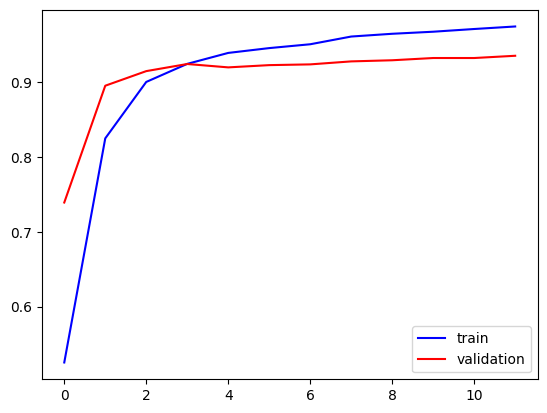

In [114]:
model.save("model.h5")
plt.plot(hist.history['accuracy'],c='b',label='train')
plt.plot(hist.history['val_accuracy'],c='r',label='validation')
plt.legend(loc='lower right')
plt.show()



In [124]:
loaded = keras.models.load_model("model.h5")
def get_key(value):
    dictionary={'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5}
    for key,val in dictionary.items():
          if (val==value):
            return key
        
        
def predict(sentence):
    sentence_lst=[]
    sentence_lst.append(sentence)
    sentence_seq=tokenizer.texts_to_sequences(sentence_lst)
    sentence_padded=pad_sequences(sentence_seq,maxlen=80,padding='post')
    ans=get_key(loaded.predict_classes(sentence_padded))
    print("The emotion predicted is",ans)
    

predict(str(input('Enter a sentence : ')))


Enter a sentence :  The movie was very satisfying and excited it was not expected and i am surprised


The emotion predicted is joy
